<a href="https://colab.research.google.com/github/ehsanem/Tensorflow/blob/main/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Types of classification problems
There are 3 types:

1. **Binary**: Two classes
2. **Multiclass**: More than 2 classes
3. **Multilable**: A single class has multiple lables




#Modelling process
The modelling process is as same as usual problems but loss function and metrics are different and depends on the problem type.

#Modelling steps

In [48]:
import tensorflow as tf
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

##Generate sample data

In [ ]:
X, y = make_circles(1000, noise=0.03, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X,y)

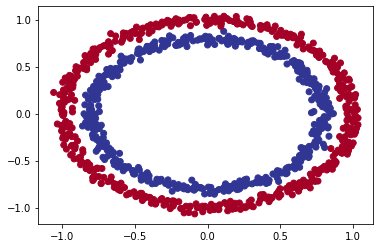

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

##Create model

In [118]:
tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1, activation='relu')
])

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.binary_crossentropy,
              metrics = ['accuracy'])

history = model.fit(X_train, y_train, epochs=100, verbose = 0)

##Create decision boundary function

In [101]:
# create a function to plot decision boundary
def decision_boundary(model, X, y):
  #create meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  # OUPTPUT: xx and yy list with shape 100 elements and each element 100 values: 100x100
  
  #flatten  xx and yy list
  x_in = np.c_[xx.ravel(), yy.ravel()]

  #make pediction
  y_pred = model.predict(x_in)
  
  #finding maximum values in each element of y array to plot decision surface
  
  # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class
  if model.output_shape[-1] > 1: 
    print("doing multiclass classification...")
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

  #plotting
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

doing binary classifcation...


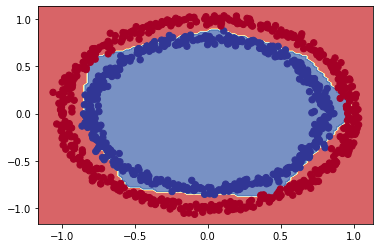

In [119]:
decision_boundary(model, X, y)

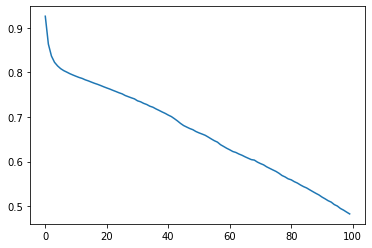

In [126]:
plt.plot(history.history['loss'])